# 郵便番号データから都道府県と市区町村の一覧を作成

日本郵便の公開データのたデータから、読み仮名を統合したデータを作成する。

データソースは以下の3つであり、日本郵便株式会社の[郵便番号データダウンロード](http://www.post.japanpost.jp/zipcode/download.html)からダウンロードしたZIPファイルに含まれるCSVファイルに対して、文字エンコーディングを UTF8 に変換し、半角カタカナを全角カタカナに変換したデータである。データのバージョンは「2018年5月31日更新」である。

- `ken_all_kogaki.csv` - 読み仮名データの促音・拗音を小書きで表記するもの
- `ken_all_oogaki.csv` - 読み仮名データの促音・拗音を小書きで表記しないもの
- `ken_all_roman.csv` - 読み仮名データのローマ字

## 準備

作業に利用するモジュールと、データファイルを読み込む。データファイルは隣接する *data/* フォルダに存在するものとする。

In [1]:
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set(font=['IPAPGothic'])

データフレームはデータ種類ごとに 1, 2, 3 の連番で管理する。住所コードを文字列で管理するため、データを読み込む時にデータタイプに `object` を指定する。

- `df1`: 小書き
- `df2`: 大書き (小書きでない)
- `df3`: ローマ字

In [2]:
df1 = pd.read_csv('../data/ken_all_kogaki.csv', dtype=object)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124189 entries, 0 to 124188
Data columns (total 15 columns):
jis_code           124189 non-null object
old_zipcode        124189 non-null object
zipcode            124189 non-null object
prefecture_kana    124189 non-null object
city_kana          124189 non-null object
town_kana          124189 non-null object
prefecture         124189 non-null object
city               124189 non-null object
town               124189 non-null object
multi_zipcode      124189 non-null object
koaza_split        124189 non-null object
choume_view        124189 non-null object
multi_chouiki      124189 non-null object
update_reason      124189 non-null object
update_type        124189 non-null object
dtypes: object(15)
memory usage: 14.2+ MB


In [3]:
df2 = pd.read_csv('../data/ken_all_oogaki.csv', dtype=object)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124189 entries, 0 to 124188
Data columns (total 15 columns):
jis_code           124189 non-null object
old_zipcode        124189 non-null object
zipcode            124189 non-null object
prefecture_kana    124189 non-null object
city_kana          124189 non-null object
town_kana          124189 non-null object
prefecture         124189 non-null object
city               124189 non-null object
town               124189 non-null object
multi_zipcode      124189 non-null object
koaza_split        124189 non-null object
choume_view        124189 non-null object
multi_chouiki      124189 non-null object
update_reason      124189 non-null object
update_type        124189 non-null object
dtypes: object(15)
memory usage: 14.2+ MB


In [4]:
df3 = pd.read_csv('../data/ken_all_roman.csv', dtype=object)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124117 entries, 0 to 124116
Data columns (total 7 columns):
zipcode             124117 non-null object
prefecture          124117 non-null object
city                124117 non-null object
town                124117 non-null object
prefecture_roman    124117 non-null object
city_roman          124117 non-null object
town_roman          124117 non-null object
dtypes: object(7)
memory usage: 6.6+ MB


3つのデータファイルを読み込み、それぞれのデータ件数と属性数を確認した。いずれも約12.4万件であるが、ローマ字のデータはカタカナのデータに比べて72件 (*124188 - 124116*) 少ない。また、ローマ字のデータには住所コードを表す `jis_code` が存在しないため、データの統合は都道府県と市区町村の名称をキーにする。

属性ごとのデータの分布も確認しておく。

In [5]:
df1.describe()

,jis_code,old_zipcode,zipcode,prefecture_kana,city_kana,town_kana,prefecture,city,town,multi_zipcode,koaza_split,choume_view,multi_chouiki,update_reason,update_type
count,124189,124189,124189,124189,124189,124189,124189,124189,124189,124189,124189,124189,124189,124189,124189
unique,1896,5020,120020,47,1884,86259,47,1894,86892,2,2,2,2,2,4
top,16201,602,4520961,ホッカイドウ,トヤマシ,イカニケイサイガナイバアイ,北海道,富山市,以下に掲載がない場合,0,0,0,0,0,0
freq,1147,660,66,8253,1147,1874,8253,1147,1874,121414,115308,102775,119013,124184,124184


In [6]:
df2.describe()

,jis_code,old_zipcode,zipcode,prefecture_kana,city_kana,town_kana,prefecture,city,town,multi_zipcode,koaza_split,choume_view,multi_chouiki,update_reason,update_type
count,124189,124189,124189,124189,124189,124189,124189,124189,124189,124189,124189,124189,124189,124189,124189
unique,1896,5020,120020,47,1884,86229,47,1894,86892,2,2,2,2,2,4
top,16201,602,4520961,ホツカイドウ,トヤマシ,イカニケイサイガナイバアイ,北海道,富山市,以下に掲載がない場合,0,0,0,0,0,0
freq,1147,660,66,8253,1147,1874,8253,1147,1874,121414,115308,102775,119013,124184,124184


In [7]:
df3.describe()

,zipcode,prefecture,city,town,prefecture_roman,city_roman,town_roman
count,124117,124117,124117,124117,124117,124117,124117
unique,119961,47,1894,86154,47,1881,84740
top,4520961,北海道,富山市,以下に掲載がない場合,HOKKAIDO,TOYAMA SHI,IKANIKEISAIGANAIBAAI
freq,66,8251,1147,1874,8251,1147,1874


## 都道府県の一覧を作成

3つのデータフレームから必要な属性を抽出して都道府県名を一意にし、名称をキーにしてカタカナ表記とローマ字表記のデータフレームを結合する。

途中、以下のデータ操作を実施する。

- 住所コードの先頭2桁が都道府県コードであるため、 *jis_code* から *prefecture_code* 属性を構成する。 
- 都道府県名の末尾文字列を抽出して「都道府県」の種類を *prefecture_type* とする。
- ローマ字表記は全て大文字になっているため、先頭だけ大文字のタイトルケースに変換する。

In [8]:
df1['prefecture_code'] = df1['jis_code'].apply(lambda s: s[:2])
pref1 = df1[['prefecture_code', 'prefecture', 'prefecture_kana']].drop_duplicates().rename(columns={'prefecture_kana': 'prefecture_kogaki'})
pref1['prefecture_type'] = pref1['prefecture'].apply(lambda s: s[-1:])
pref1.head()

,prefecture_code,prefecture,prefecture_kogaki,prefecture_type
0,01,北海道,ホッカイドウ,道
8253,02,青森県,アオモリケン,県
10769,03,岩手県,イワテケン,県
12842,04,宮城県,ミヤギケン,県
16217,05,秋田県,アキタケン,県


In [9]:
pref2 = df2[['prefecture', 'prefecture_kana']].drop_duplicates().rename(columns={'prefecture_kana': 'prefecture_oogaki'})
pref2.head(2)

,prefecture,prefecture_oogaki
0,北海道,ホツカイドウ
8253,青森県,アオモリケン


In [10]:
pref3 = df3[['prefecture', 'prefecture_roman']].drop_duplicates()
pref3['prefecture_roman'] = pref3['prefecture_roman'].apply(str.title)
pref3.head(2)

,prefecture,prefecture_roman
0,北海道,Hokkaido
8251,青森県,Aomori Ken


In [11]:
pref = pref1.merge(pref2, on='prefecture').merge(pref3, on='prefecture').rename(columns={'prefecture': 'prefecture_name'})
pref = pref[['prefecture_code', 'prefecture_name', 'prefecture_type', 'prefecture_kogaki', 'prefecture_oogaki', 'prefecture_roman']]
pref

,prefecture_code,prefecture_name,prefecture_type,prefecture_kogaki,prefecture_oogaki,prefecture_roman
0,01,北海道,道,ホッカイドウ,ホツカイドウ,Hokkaido
1,02,青森県,県,アオモリケン,アオモリケン,Aomori Ken
2,03,岩手県,県,イワテケン,イワテケン,Iwate Ken
3,04,宮城県,県,ミヤギケン,ミヤギケン,Miyagi Ken
4,05,秋田県,県,アキタケン,アキタケン,Akita Ken
5,06,山形県,県,ヤマガタケン,ヤマガタケン,Yamagata Ken
6,07,福島県,県,フクシマケン,フクシマケン,Fukushima Ken
7,08,茨城県,県,イバラキケン,イバラキケン,Ibaraki Ken
8,09,栃木県,県,トチギケン,トチギケン,Tochigi Ken
9,10,群馬県,県,グンマケン,グンマケン,Gumma Ken


## 市区町村の一覧を作成

都道府県の場合と同様にして市区町のレベルでもデータを結合する。なお、同名の市区町村名が存在し、ローマ字表記のデータには市区町村名に空白区切りが含まれているので、結合キーとする文字列は専用に用意する必要がある。

In [12]:
city1 = df1[['jis_code', 'prefecture', 'city', 'city_kana']].drop_duplicates().rename(columns={'jis_code': 'city_code', 'city_kana': 'city_kogaki'})
city1['city_type'] = city1['city'].apply(lambda s: s[-1:])
city1.describe()

,city_code,prefecture,city,city_kogaki,city_type
count,1896,1896,1896,1896,1896
unique,1896,47,1894,1884,4
top,01634,北海道,伊達市,ミヨシシ,市
freq,1,188,2,3,771


In [13]:
city2 = df2[['prefecture', 'city', 'city_kana']].drop_duplicates().rename(columns={'city_kana': 'city_oogaki'})
city2.describe()

,prefecture,city,city_oogaki
count,1896,1896,1896
unique,47,1894,1884
top,北海道,伊達市,ミヨシシ
freq,188,2,3


In [14]:
city3 = df3[['prefecture', 'city', 'city_roman']].drop_duplicates()
city3['city_roman'] = city3['city_roman'].apply(str.title)
city3['city_sep'] = city3['city']
city3['city_levels'] = city3['city_sep'].apply(lambda s: len(s.split())).map(int)
city3[['prefecture', 'city', 'city_roman', 'city_sep']].describe()

,prefecture,city,city_roman,city_sep
count,1896,1896,1896,1896
unique,47,1894,1881,1894
top,北海道,伊達市,Konan Shi,伊達市
freq,188,2,3,2


In [15]:
city3.groupby('city_levels').agg({'prefecture': ['count', 'nunique'], 'city': ['nunique']})

prefecture            city
                 count nunique nunique
city_levels                           
1                  801      47     799
2                 1095      47    1095

In [16]:
city1['key'] = city1['prefecture']  + city1['city']
city2['key'] = city2['prefecture']  + city2['city']
city3['key'] = city3['prefecture']  + city3['city'].map(lambda s: s.replace(' ', ''))
city = city1.merge(city2[['key', 'city_oogaki']], on='key').merge(city3[['key', 'city_roman', 'city_sep', 'city_levels']], on='key')
city = city.drop('key', axis=1)
city.head()

,city_code,prefecture,city,city_kogaki,city_type,city_oogaki,city_roman,city_sep,city_levels
0,01101,北海道,札幌市中央区,サッポロシチュウオウク,区,サツポロシチユウオウク,Sapporo Shi Chuo Ku,札幌市 中央区,2
1,01102,北海道,札幌市北区,サッポロシキタク,区,サツポロシキタク,Sapporo Shi Kita Ku,札幌市 北区,2
2,01103,北海道,札幌市東区,サッポロシヒガシク,区,サツポロシヒガシク,Sapporo Shi Higashi Ku,札幌市 東区,2
3,01104,北海道,札幌市白石区,サッポロシシロイシク,区,サツポロシシロイシク,Sapporo Shi Shiroishi Ku,札幌市 白石区,2
4,01105,北海道,札幌市豊平区,サッポロシトヨヒラク,区,サツポロシトヨヒラク,Sapporo Shi Toyohira Ku,札幌市 豊平区,2


In [17]:
city = city.rename(columns={'city': 'city_name', 'prefecture': 'prefecture_name'})
city['prefecture_code'] = city['city_code'].apply(lambda s: s[:2])
city[['prefecture_code', 'prefecture_name', 'city_code', 'city_type', 'city_name', 'city_sep', 'city_kogaki', 'city_oogaki', 'city_roman']].describe()

,prefecture_code,prefecture_name,city_code,city_type,city_name,city_sep,city_kogaki,city_oogaki,city_roman
count,1896,1896,1896,1896,1896,1896,1896,1896,1896
unique,47,47,1896,4,1894,1894,1884,1884,1881
top,01,北海道,01634,市,伊達市,伊達市,ミヨシシ,ミヨシシ,Konan Shi
freq,188,188,1,771,2,2,3,3,3


1896件の市区町村の一覧を作成できたので、カラム名を並び替える。

In [18]:
city = city[['prefecture_code', 'prefecture_name', 'city_code', 'city_name', 'city_type', 'city_levels', 'city_sep', 'city_kogaki', 'city_oogaki', 'city_roman']]
city.head()

,prefecture_code,prefecture_name,city_code,city_name,city_type,city_levels,city_sep,city_kogaki,city_oogaki,city_roman
0,01,北海道,01101,札幌市中央区,区,2,札幌市 中央区,サッポロシチュウオウク,サツポロシチユウオウク,Sapporo Shi Chuo Ku
1,01,北海道,01102,札幌市北区,区,2,札幌市 北区,サッポロシキタク,サツポロシキタク,Sapporo Shi Kita Ku
2,01,北海道,01103,札幌市東区,区,2,札幌市 東区,サッポロシヒガシク,サツポロシヒガシク,Sapporo Shi Higashi Ku
3,01,北海道,01104,札幌市白石区,区,2,札幌市 白石区,サッポロシシロイシク,サツポロシシロイシク,Sapporo Shi Shiroishi Ku
4,01,北海道,01105,札幌市豊平区,区,2,札幌市 豊平区,サッポロシトヨヒラク,サツポロシトヨヒラク,Sapporo Shi Toyohira Ku


同一の市区町村名のデータを確認しておく。漢字表記が同じ場所は「伊達市」と「府中市」のみだが、異なる表記で読み仮名あるいはローマ字表記が同じ場所がいくつか存在する。

In [19]:
city[city['city_roman'].duplicated(keep=False)].sort_values(['city_roman', 'city_code'])

,prefecture_code,prefecture_name,city_code,city_name,city_type,city_levels,city_sep,city_kogaki,city_oogaki,city_roman
40,01,北海道,01233,伊達市,市,1,伊達市,ダテシ,ダテシ,Date Shi
371,07,福島県,07213,伊達市,市,1,伊達市,ダテシ,ダテシ,Date Shi
682,13,東京都,13206,府中市,市,1,府中市,フチュウシ,フチユウシ,Fuchu Shi
1475,34,広島県,34208,府中市,市,1,府中市,フチュウシ,フチユウシ,Fuchu Shi
43,01,北海道,01236,北斗市,市,1,北斗市,ホクトシ,ホクトシ,Hokuto Shi
869,19,山梨県,19209,北杜市,市,1,北杜市,ホクトシ,ホクトシ,Hokuto Shi
1252,27,大阪府,27219,和泉市,市,1,和泉市,イズミシ,イズミシ,Izumi Shi
1816,46,鹿児島県,46208,出水市,市,1,出水市,イズミシ,イズミシ,Izumi Shi
436,08,茨城県,08222,鹿嶋市,市,1,鹿嶋市,カシマシ,カシマシ,Kashima Shi
1684,41,佐賀県,41207,鹿島市,市,1,鹿島市,カシマシ,カシマシ,Kashima Shi


市区町村の数を集計する。

In [20]:
city.groupby('city_type').agg({'city_code': 'count', 'prefecture_code': 'nunique', 'city_levels': ['min', 'max', 'mean']})

city_code prefecture_code city_levels              
              count         nunique         min max      mean
city_type                                                    
区               198              16           1   2  1.883838
市               771              47           1   1  1.000000
村               183              34           1   2  1.967213
町               744              47           1   2  1.998656

都道府県ごとの市区町村の数をグラフにプロットする。

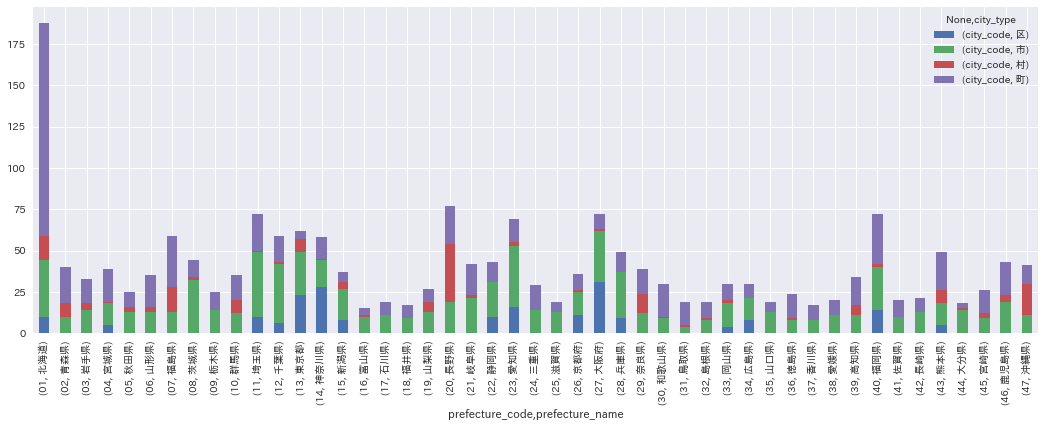

In [21]:
city.groupby(['prefecture_code', 'prefecture_name', 'city_type']).count()[['city_code']].unstack().plot(
    kind='bar', stacked=True, figsize=(18, 6))

都道府県ごとの集計表を作成する。上記のグラフの数値と、政令指定都市や郡などの階層化された表記の数を市区町村ごとに集計する。

In [22]:
city.groupby(['prefecture_code', 'prefecture_name', 'city_type']).agg({'city_name': ['count'], 'city_levels': ['mean', 'min', 'max']}).unstack()

city_name                    city_levels       \
                                    count                           mean        
city_type                               区     市     村      町           区    市   
prefecture_code prefecture_name                                                 
01              北海道                  10.0  34.0  15.0  129.0         2.0  1.0   
02              青森県                   NaN  10.0   8.0   22.0         NaN  1.0   
03              岩手県                   NaN  14.0   4.0   15.0         NaN  1.0   
04              宮城県                   5.0  13.0   1.0   20.0         2.0  1.0   
05              秋田県                   NaN  13.0   3.0    9.0         NaN  1.0   
06              山形県                   NaN  13.0   3.0   19.0         NaN  1.0   
07              福島県                   NaN  13.0  15.0   31.0         NaN  1.0   
08              茨城県                   NaN  32.0   2.0   10.0         NaN  1.0   
09              栃木県                   NaN  14.0   NaN   11.0         NaN  1.0   
10              群馬県                   NaN  12.0   8.0   15.0         NaN  1.0   
11              埼玉県                  10.0  39.0   1.0   22.0         2.0  1.0   
12              千葉県                   6.0  36.0   1.0   16.0         2.0  1.0   
13              東京都                  23.0  26.0   8.0    5.0         1.0  1.0   
14              神奈川県                 28.0  16.0   1.0   13.0         2.0  1.0   
15              新潟県                   8.0  19.0   4.0    6.0         2.0  1.0   
16              富山県                   NaN  10.0   1.0    4.0         NaN  1.0   
17              石川県                   NaN  11.0   NaN    8.0         NaN  1.0   
18              福井県                   NaN   9.0   NaN    8.0         NaN  1.0   
19              山梨県                   NaN  13.0   6.0    8.0         NaN  1.0   
20              長野県                   NaN  19.0  35.0   23.0         NaN  1.0   
21              岐阜県                   NaN  21.0   2.0   19.0         NaN  1.0   
22              静岡県                  10.0  21.0   NaN   12.0         2.0  1.0   
23              愛知県                  16.0  37.0   2.0   14.0         2.0  1.0   
24              三重県                   NaN  14.0   NaN   15.0         NaN  1.0   
25              滋賀県                   NaN  13.0   NaN    6.0         NaN  1.0   
26              京都府                  11.0  14.0   1.0   10.0         2.0  1.0   
27              大阪府                  31.0  31.0   1.0    9.0         2.0  1.0   
28              兵庫県                   9.0  28.0   NaN   12.0         2.0  1.0   
29              奈良県                   NaN  12.0  12.0   15.0         NaN  1.0   
30              和歌山県                  NaN   9.0   1.0   20.0         NaN  1.0   
31              鳥取県                   NaN   4.0   1.0   14.0         NaN  1.0   
32              島根県                   NaN   8.0   1.0   10.0         NaN  1.0   
33              岡山県                   4.0  14.0   2.0   10.0         2.0  1.0   
34              広島県                   8.0  13.0   NaN    9.0         2.0  1.0   
35              山口県                   NaN  13.0   NaN    6.0         NaN  1.0   
36              徳島県                   NaN   8.0   1.0   15.0         NaN  1.0   
37              香川県                   NaN   8.0   NaN    9.0         NaN  1.0   
38              愛媛県                   NaN  11.0   NaN    9.0         NaN  1.0   
39              高知県                   NaN  11.0   6.0   17.0         NaN  1.0   
40              福岡県                  14.0  26.0   2.0   30.0         2.0  1.0   
41              佐賀県                   NaN  10.0   NaN   10.0         NaN  1.0   
42              長崎県                   NaN  13.0   NaN    8.0         NaN  1.0   
43              熊本県                   5.0  13.0   8.0   23.0         2.0  1.0   
44              大分県                   NaN  14.0   1.0    3.0         NaN  1.0   
45              宮崎県                   NaN   9.0   3.0   14.0         NaN  1.0   
46              鹿児島県                  NaN  19.0   4.0   20.0   

東京都のみ、町と村の *city_levels* の平均値 (*mean*) が1と2の間になっている。
具体的に東京都の23区以外の市町村の一覧を列挙すると、「西多摩郡」は町と村を含む階層になっており、離島については「三宅島」と「八丈島」は2階層だがそれ以外は1階層になっていることが分かる。

In [23]:
city[(city['prefecture_code'] == '13') & (city['city_type'] != '区')]

,prefecture_code,prefecture_name,city_code,city_name,city_type,city_levels,city_sep,city_kogaki,city_oogaki,city_roman
677,13,東京都,13201,八王子市,市,1,八王子市,ハチオウジシ,ハチオウジシ,Hachioji Shi
678,13,東京都,13202,立川市,市,1,立川市,タチカワシ,タチカワシ,Tachikawa Shi
679,13,東京都,13203,武蔵野市,市,1,武蔵野市,ムサシノシ,ムサシノシ,Musashino Shi
680,13,東京都,13204,三鷹市,市,1,三鷹市,ミタカシ,ミタカシ,Mitaka Shi
681,13,東京都,13205,青梅市,市,1,青梅市,オウメシ,オウメシ,Ome Shi
682,13,東京都,13206,府中市,市,1,府中市,フチュウシ,フチユウシ,Fuchu Shi
683,13,東京都,13207,昭島市,市,1,昭島市,アキシマシ,アキシマシ,Akishima Shi
684,13,東京都,13208,調布市,市,1,調布市,チョウフシ,チヨウフシ,Chofu Shi
685,13,東京都,13209,町田市,市,1,町田市,マチダシ,マチダシ,Machida Shi
686,13,東京都,13210,小金井市,市,1,小金井市,コガネイシ,コガネイシ,Koganei Shi


## 出力

都道府県の一覧と、市区町村の一覧を CSV ファイルに出力する。

In [24]:
pref.to_csv('prefecture.csv', index=False)

In [25]:
city.to_csv('city.csv', index=False)